In [1]:
# Standar libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
import dpivsoft.Postprocessing as post

%matplotlib widget

# Set the Directories

In [2]:
dirResults = "./EPM_3980_Results_piv16x16/"
extension = 'npz'

if not os.path.exists(dirResults):
    print("Unknown directory" )
else:
    files = os.listdir(dirResults)
    files = sorted([i for i in files if i.endswith(extension)])
    print(files)

['gpu_field_000.npz', 'gpu_field_001.npz', 'gpu_field_002.npz', 'gpu_field_003.npz', 'gpu_field_004.npz', 'gpu_field_005.npz', 'gpu_field_006.npz', 'gpu_field_007.npz', 'gpu_field_008.npz', 'gpu_field_009.npz', 'gpu_field_010.npz', 'gpu_field_011.npz', 'gpu_field_012.npz', 'gpu_field_013.npz', 'gpu_field_014.npz', 'gpu_field_015.npz', 'gpu_field_016.npz', 'gpu_field_017.npz', 'gpu_field_018.npz', 'gpu_field_019.npz', 'gpu_field_020.npz', 'gpu_field_021.npz', 'gpu_field_022.npz', 'gpu_field_023.npz', 'gpu_field_024.npz', 'gpu_field_025.npz', 'gpu_field_026.npz', 'gpu_field_027.npz', 'gpu_field_028.npz', 'gpu_field_029.npz', 'gpu_field_030.npz', 'gpu_field_031.npz', 'gpu_field_032.npz', 'gpu_field_033.npz', 'gpu_field_034.npz', 'gpu_field_035.npz', 'gpu_field_036.npz', 'gpu_field_037.npz', 'gpu_field_038.npz', 'gpu_field_039.npz', 'gpu_field_040.npz', 'gpu_field_041.npz', 'gpu_field_042.npz', 'gpu_field_043.npz', 'gpu_field_044.npz', 'gpu_field_045.npz', 'gpu_field_046.npz', 'gpu_field_0

# Load the PIV data

In [3]:
#Load PIV results
Data = np.load(dirResults+'gpu_field_002.npz')
x = Data['x']
y = Data['y']
u = Data['u']
v = Data['v']

# Plot Velocity Vectors


Text(0, 0.5, 'y (pixels)')

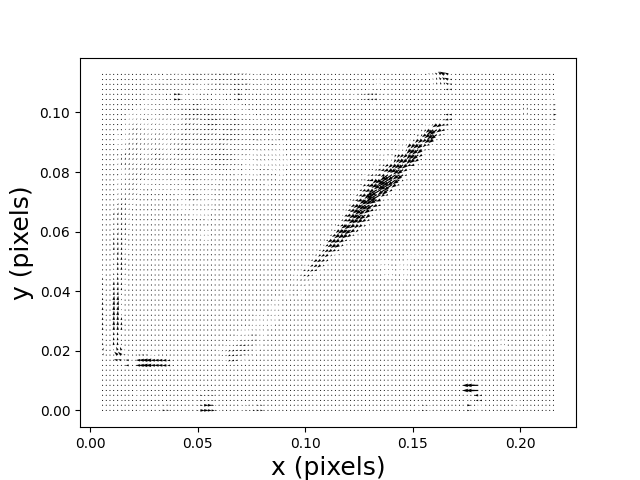

In [4]:
fig, ax1 = plt.subplots()
ax1.quiver(x, y, u, v, scale=1 )
ax1.set_xlabel('x (pixels)',fontsize=18)
ax1.set_ylabel('y (pixels)',fontsize=18)

# Plot Velocity magnitude

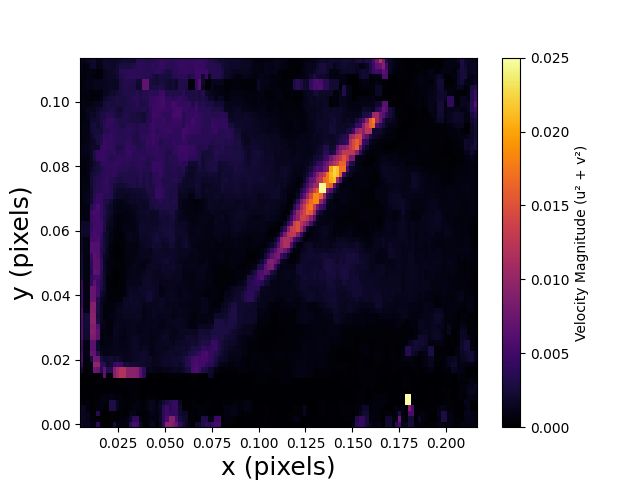

In [5]:
velocity_magnitude = np.sqrt(u**2 + v**2)
vmin = 0
  # Set your desired minimum value
vmax = 0.025#velocity_magnitude.max() # Or set a custom maximum value

fig2, ax = plt.subplots()
c = ax.pcolormesh(x, y, velocity_magnitude, shading='auto', cmap='inferno', vmin=vmin, vmax=vmax)
fig2.colorbar(c, ax=ax, label='Velocity Magnitude (u² + v²)')
ax.set_xlabel('x (pixels)', fontsize=18)
ax.set_ylabel('y (pixels)', fontsize=18)
plt.show()

In [6]:
# Define box corners
x1, y1 = 0.1281, 0.078  # upper left corner (change as needed)
x2, y2 = 0.1403, 0.0675  # lower right corner (change as needed)

# Create mask for points inside the box
mask = (x >= x1) & (x <= x2) & (y <= y1) & (y >= y2)

# Calculate mean of u inside the box
mean_u = np.mean(velocity_magnitude[mask])
print(f"Mean u inside the box: {mean_u}")

Mean u inside the box: 0.013476391322910786


/var/folders/0k/7cbvxwfn3tz4twsbtpvx93s40000gn/T/ipykernel_58748/2348074565.py:33: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 640x480 with 2 Axes> which fig.colorbar is called on.
  fig2.colorbar(c, ax=ax, label='Vorticity')


Text(0.5, 0.98, 'Mean Vorticity over 60 frames')

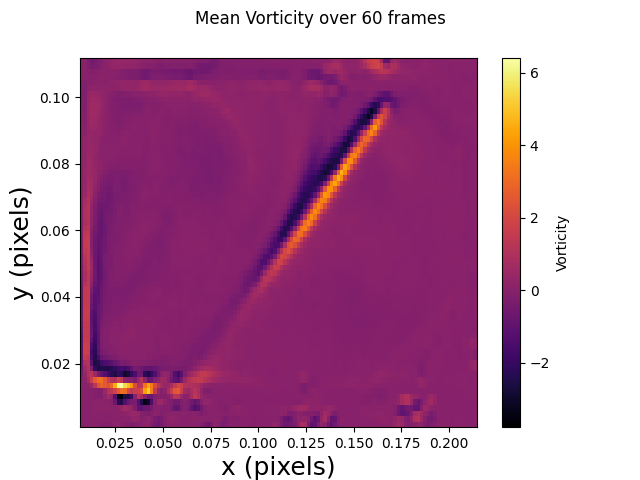

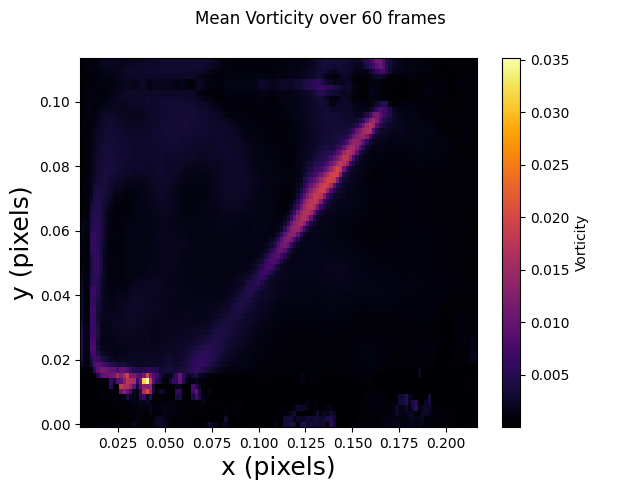

In [7]:
files = os.listdir(dirResults)
files = sorted([i for i in files if i.endswith('.npz')]);
#print(files)

for i in range(len(files)):
    Data = np.load(dirResults+files[i])
    x = Data['x']
    y = Data['y']
    u = Data['u']
    v = Data['v']
    if i==0:
        xvort,yvort,vorticity=post.vorticity(x, y, u, v, 'circulation')
        magnitude_mean = np.zeros(u.shape)
        vorticity_mean = np.zeros(vorticity.shape)
    magnitude=np.sqrt(u**2 + v**2)
    xvort,yvort,vorticity=post.vorticity(x, y, u, v, 'circulation')
    magnitude_mean+= magnitude
    vorticity_mean+= vorticity

magnitude_mean/=len(files)  
vorticity_mean/=len(files)

data=vorticity_mean
xdata=xvort
ydata=yvort

datamin = data.min()
  # Set your desired minimum value
datamax = data.max() #velocity_magnitude.max() # Or set a custom maximum value

fig1, ax = plt.subplots()
c = ax.pcolormesh(xdata, ydata, data, shading='auto', cmap='inferno', vmin=datamin, vmax=datamax)
fig2.colorbar(c, ax=ax, label='Vorticity')
ax.set_xlabel('x (pixels)', fontsize=18)
ax.set_ylabel('y (pixels)', fontsize=18)
fig1.suptitle('Mean Vorticity over '+str(len(files))+' frames')
# plt.show()

data=magnitude_mean
xdata=x
ydata=y

datamin = data.min()
  # Set your desired minimum value
datamax = data.max() #velocity_magnitude.max() # Or set a custom maximum value

fig2, ax = plt.subplots()
c = ax.pcolormesh(xdata, ydata, data, shading='auto', cmap='inferno', vmin=datamin, vmax=datamax)
fig2.colorbar(c, ax=ax, label='Vorticity')
ax.set_xlabel('x (pixels)', fontsize=18)
ax.set_ylabel('y (pixels)', fontsize=18)
fig2.suptitle('Mean Vorticity over '+str(len(files))+' frames')
# plt.show()